# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
N_TRAIN = np.size(X_train, 0)

# TODO: Number of validation examples
N_VALIDATION = np.size(X_valid, 0)

# TODO: Number of testing examples.
N_TEST = np.size(X_test, 0)

# TODO: What's the shape of an traffic sign image?
IMAGE_SHAPE = str(X_train[0].shape[0]) + ' x ' + str(X_train[0].shape[1])

# TODO: How many unique classes/labels there are in the dataset.
N_CLASSES = np.size(np.unique(y_train), 0)

print("Number of training examples =", N_TRAIN)
print("Number of validation examples =", N_VALIDATION)
print("Number of testing examples =", N_TEST)
print("Image data shape =", IMAGE_SHAPE)
print("Number of classes =", N_CLASSES)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32 x 32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

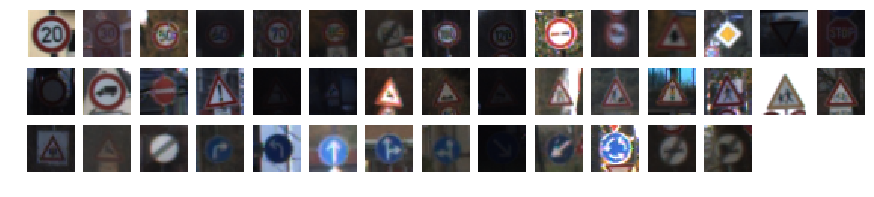

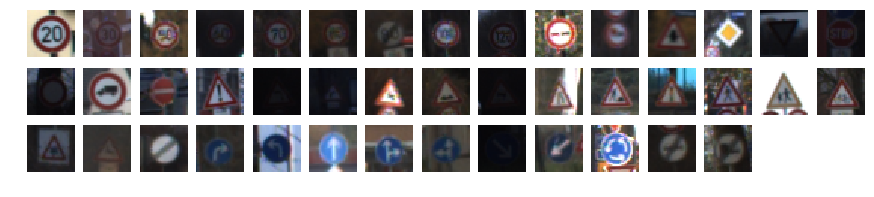

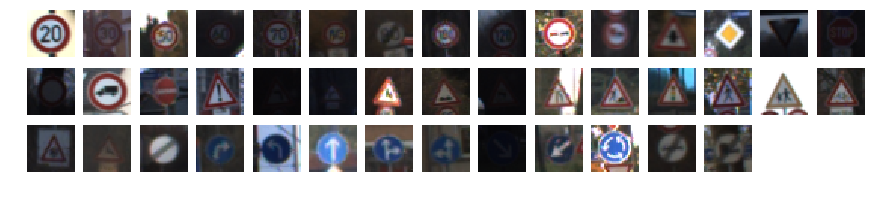

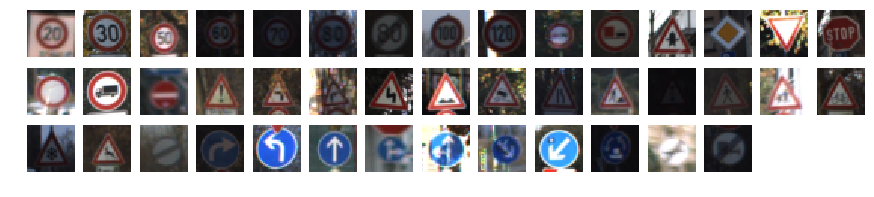

In [12]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


def get_class_dict(y_data):
    """
    Return a class dictionary whose keys are the class 
    labels and values are the indices of the class labels.
    """
    from collections import defaultdict
    class_dict = defaultdict(list)
    for i, y in enumerate(y_data):
        class_dict[y].append(i)
    return class_dict


def get_sample_images(X_data, y_data, start='random') :
    """
    Get images from each class, 
    start is the starting index in each class.
    By default, images are randomly chosen from each class.
    """
    image_list = []
    class_dict = get_class_dict(y_data)
    labels = list(set(y_data))[::-1]
    for _ in range(len(labels)):
        if start == 'random':
            i_img = random.choice(class_dict[labels.pop()])  
        else : 
            i_img = class_dict[labels.pop()][start]
        image_list.append(X_data[i_img])
    return image_list


def show_sample_images(image_list) :
    """
    Displays images from each class, 
    start is the starting index in each class.
    By default, images are randomly chosen from each class.
    """
    image_count = len(image_list)
    fig, axes = plt.subplots(3, 15, figsize=(15, 3))
    for idx, ax in enumerate(axes.flatten()):
        if idx < image_count:
            ax.imshow(image_list[idx])
        ax.axis('off')
        
show_sample_images(get_sample_images(X_train, y_train, start=0)) 
show_sample_images(get_sample_images(X_train, y_train, start=1))
show_sample_images(get_sample_images(X_train, y_train, start=3))
show_sample_images(get_sample_images(X_train, y_train))

The adjacent signs of the same class look like almost no difference. So we should disturb them in order to get ideal performance.

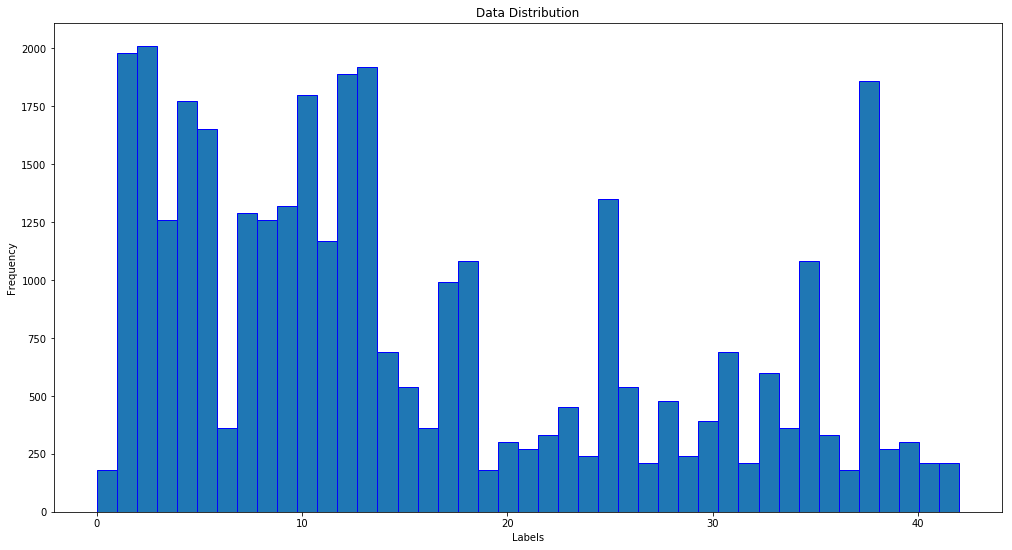

In [13]:
# Explore data distribution using histogram
import matplotlib.pyplot as plt

def show_histogram(y_data):
    fig = plt.figure(figsize=(17, 9))
    plt.hist(y_data, bins=N_CLASSES, histtype='bar', edgecolor='b')
    plt.title("Data Distribution")
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.show()

show_histogram(y_train)

The histogram show the trainning samples very skewed in training set. Some labels have very little samples, while some have many more samples. 

In [14]:
# print the number of sample for each label.
def get_class_dist_dict(y_data):
    class_dist_dict = {}
    _, counts = np.unique(y_data, return_counts=True)
    for idx, val in enumerate(counts):
        class_dist_dict[idx] = val
    return class_dist_dict

get_class_dist_dict(y_train)

{0: 180,
 1: 1980,
 2: 2010,
 3: 1260,
 4: 1770,
 5: 1650,
 6: 360,
 7: 1290,
 8: 1260,
 9: 1320,
 10: 1800,
 11: 1170,
 12: 1890,
 13: 1920,
 14: 690,
 15: 540,
 16: 360,
 17: 990,
 18: 1080,
 19: 180,
 20: 300,
 21: 270,
 22: 330,
 23: 450,
 24: 240,
 25: 1350,
 26: 540,
 27: 210,
 28: 480,
 29: 240,
 30: 390,
 31: 690,
 32: 210,
 33: 599,
 34: 360,
 35: 1080,
 36: 330,
 37: 180,
 38: 1860,
 39: 270,
 40: 300,
 41: 210,
 42: 210}

### Data Augmentation

The above histogram show very skewed distribution. It will result in poor accuracy, so we need make more training sample using argmentation.

In [4]:
import cv2
import skimage

def random_brightness(image, ratio):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2HSV)
    brightness = np.float64(hsv[:, :, 2])
    brightness = brightness * (1.0 + np.random.uniform(-ratio, ratio))
    brightness[brightness>255] = 255
    brightness[brightness<0] = 0
    hsv[:, :, 2] = brightness
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


def random_rotation(image, angle):
    """
    Randomly rotate the image
    """
    if angle == 0:
        return image
    angle = np.random.uniform(-angle, angle)
    rows, cols = image.shape[:2]
    size = cols, rows
    center = cols/2, rows/2
    scale = 1.0
    rotation = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, rotation, size)


def random_translation(image, translation):
    """
    Randomly move the image
    """
    if translation == 0:
        return 0
    rows, cols = image.shape[:2]
    size = cols, rows
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)
    trans = np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(image, trans, size)


def random_shear(image, shear):
    """
    Randomly distort the image
    """
    if shear == 0:
        return image
    rows, cols = image.shape[:2]
    size = cols, rows
    left, right, top, bottom = shear, cols - shear, shear, rows - shear
    dx = np.random.uniform(-shear, shear)
    dy = np.random.uniform(-shear, shear)
    p1 = np.float32([[left   , top],[right   , top   ],[left, bottom]])
    p2 = np.float32([[left+dx, top],[right+dx, top+dy],[left, bottom+dy]])
    move = cv2.getAffineTransform(p1,p2)
    return cv2.warpAffine(image, move, size)
    
    
def random_scaling(image, x_scale, y_scale):
    """
    Randomly scale the image
    """
    r, c = image.shape[:-1]
    scaled_img = cv2.resize(image, None, fx=x_scale, fy=y_scale)
    new_img = cv2.copyMakeBorder(scaled_img, 5, 5, 5, 5, cv2.BORDER_REPLICATE)
    rows, cols = new_img.shape[:-1]
    r0, c0 = round((rows-r)/2), round((cols-c)/2)
    return new_img[r0:r0+r, c0:c0+c]


def random_noise(image):
    """
    Randomly add noise to image
    """
    noisy_image = skimage.util.random_noise(image, mode='gaussian', seed=None, clip=True) 
    return np.asarray(noisy_image)
    
    
def augment_image(image, 
                  brightness=0.5, 
                  angle=10, 
                  translation=5, 
                  shear=2, 
                  x_scale=0.85, 
                  y_scale=1.15):
    case = np.random.randint(0,5)
    if case == 0:
        image = random_brightness(image, brightness)
    elif case == 1:
        image = random_rotation(image, angle)
    elif case == 2:
        image = random_translation(image, translation)
    elif case == 3:
        image = random_shear(image, shear)
    elif case == 4:
        image = random_scaling(image, x_scale, y_scale)
    else:
        raise ValueError("could not find case %d", case)

    return image

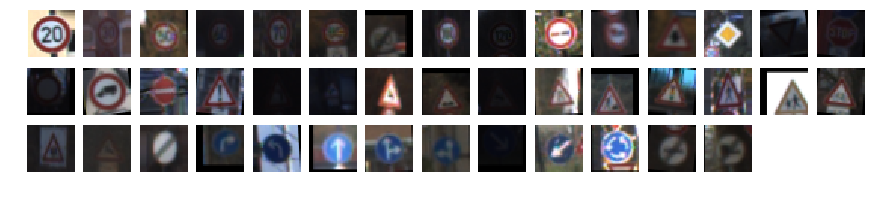

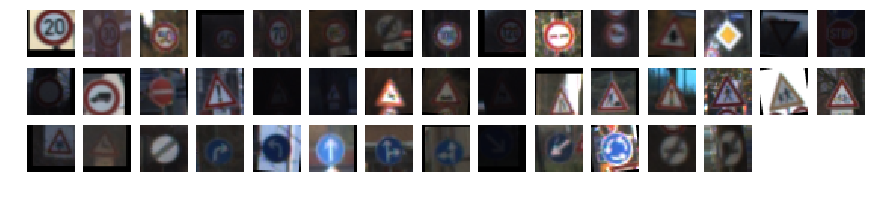

In [16]:
augmenter = lambda x: augment_image(x)

aug_image_lst1 = [augmenter(x) for x in get_sample_images(X_train, y_train, start=0)]
aug_image_lst2 = [augmenter(x) for x in get_sample_images(X_train, y_train, start=1)]
show_sample_images(aug_image_lst1)
show_sample_images(aug_image_lst2)

In [17]:
def random_pick_image(X_data, y_data, class_type):
    class_dict = get_class_dict(y_data)
    image_idx = random.choice(class_dict[class_type])
    return augmenter(X_data[image_idx]), y_data[image_idx]

def balance_distribution(X_data, y_data, size):
    X_balanced = []
    y_balanced = []
    X_balanced.extend(X_data)
    y_balanced.extend(y_data)
    class_dist_dict = get_class_dist_dict(y_data)
    for c in range(N_CLASSES):
        cnt = class_dist_dict[c]
        while cnt < size:
            image, y_label = random_pick_image(X_data, y_data, c)
            X_balanced.append(image)
            y_balanced.append(y_label)
            cnt += 1
    return np.array(X_balanced), np.array(y_balanced)

X_train, y_train = balance_distribution(X_train, y_train, 5000)

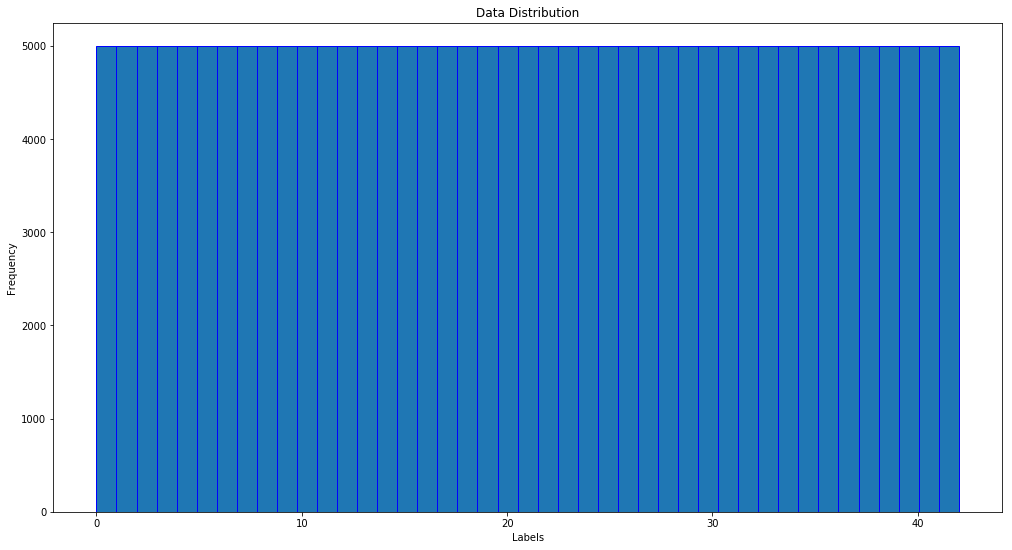

In [18]:
show_histogram(y_train)

For each label, I increase more samples up 5000. Now it looks balanced.

The data augmentation is performed by the following loop
new count = 5000
while count of each label is less than new count
randomly pick from 1 to 5
1. adjust the brightness of the image radomly
2. rotate the image radomly
3. translate the image radomly
4. shear the image radomly
5. scale the image radomly


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import matplotlib.image as mpimg


# shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

def rgb2gray(rgb):
    mix = np.array([0.299, 0.587, 0.114]).reshape(-1, 1)
    return np.dot(rgb[...,:3], mix)

def normalize(image):
    """
    Normalize the image data 
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    return (image - image.mean()) / image.std()

X_train = normalize(rgb2gray(X_train))
X_valid = normalize(rgb2gray(X_valid))
X_test = normalize(rgb2gray(X_test))

print(X_train.shape)
print('Normalize Finished!')

### Model Architecture

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x, n_class): 
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x24.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 24), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(24))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x24. Output = 14x14x24.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x24 Output = 10x10x64.
    global conv2
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)
    # Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1    = tf.nn.relu(fc1)  

    # Layer 4: Fully Connected. Input = 1024. Output = 480.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 480), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(480))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b 
    # Activation.
    fc2    = tf.nn.relu(fc2)   
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 480. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(480, n_class), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_class))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Features and Labels

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, N_CLASSES)

#### Training Pipeline

Create a training pipeline.

In [22]:
rate = 0.0001

logits = LeNet(x, N_CLASSES)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

NameError: name 'logits' is not defined

#### Train the Model

Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.
Save the model after training.

In [24]:
from datetime import datetime

EPOCHS = 20
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        startTime = datetime.now()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print(str((datetime.now() - startTime).total_seconds()) + ' secs')
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.704
363.071716 secs

EPOCH 2 ...
Validation Accuracy = 0.876
314.573408 secs

EPOCH 3 ...
Validation Accuracy = 0.922
314.879281 secs

EPOCH 4 ...
Validation Accuracy = 0.934
331.44299 secs

EPOCH 5 ...
Validation Accuracy = 0.950
347.626151 secs

EPOCH 6 ...
Validation Accuracy = 0.953
358.981347 secs

EPOCH 7 ...
Validation Accuracy = 0.958
474.402494 secs

EPOCH 8 ...
Validation Accuracy = 0.962
466.333097 secs

EPOCH 9 ...
Validation Accuracy = 0.963
349.896573 secs

EPOCH 10 ...
Validation Accuracy = 0.969
318.026475 secs

EPOCH 11 ...
Validation Accuracy = 0.968
345.909665 secs

EPOCH 12 ...
Validation Accuracy = 0.971
316.77147 secs

EPOCH 13 ...
Validation Accuracy = 0.971
334.943827 secs

EPOCH 14 ...
Validation Accuracy = 0.973
317.602544 secs

EPOCH 15 ...
Validation Accuracy = 0.972
362.768377 secs

EPOCH 16 ...
Validation Accuracy = 0.973
325.070592 secs

EPOCH 17 ...
Validation Accuracy = 0.977
333.612143 secs

EPOCH 18 ...

### Validate the test set

In [25]:
with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.970


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [7]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# %% load downloaded 10 images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import csv
import glob

img_files = glob.glob('download_images/*')
n_samples = len(img_files)
fig = plt.figure(figsize=(16, 9))

images = []
for i in range(n_samples):
    image = mpimg.imread(img_files[i])
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
    fig.add_subplot(2, n_samples/2, i+1)
    plt.imshow(image)
    images.append(image) 
    plt.axis('off')
    plt.title(i, fontsize = 16)

images_normal = normalize(rgb2gray(np.array(images)))

### Predict the Sign Type for Each Image

In [12]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# %% prediction code
import pandas as pd

import tensorflow as tf
saver = tf.train.Saver()

def predict_sign(X_data, top_k=1):
    num_examples = len(X_data)
    y_pred = np.zeros((num_examples, top_k), dtype=np.int32)
    y_prob = np.zeros((num_examples, top_k))
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        y_prob, y_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=top_k), 
                             feed_dict={x:X_data, keep_prob:1})
    return y_prob, y_pred

# make predictions
_, y_pred = predict_sign(images_normal, top_k=3)

# read sign name
sign_names = pd.read_csv('signnames.csv')

# show the prediction results
fig = plt.figure(figsize=(16, 9))
for i in range(n_samples):
    fig.add_subplot(2, n_samples/2, i+1)
    plt.imshow(images[i]) 
    plt.title(sign_names.iloc[y_pred[i][0]]['SignName'])
    plt.axis('off')

ValueError: No variables to save

My test accuracy is up to 97%.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [1]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# %%plot softmax probabilities


def show_top_prob(X_data, sign_names) :
    n_samples = len(X_data)
    
    X_data_proc = normalize(rgb2gray(np.array(X_data)))
    prob, pred = predict_sign(X_data_proc, top_k=5) 
    fig, ax = plt.subplots(n_samples, 2, figsize=(12,14))   
    for i in range(n_samples):
        labels = pred[i]
        names = [sign_names.iloc[l]['SignName'] for l in labels]
        bar_locations = np.arange(3)[::-1]
        ax[i,0].imshow(X_data[i])
        ax[i,0].axis('off')
        ax[i,1].barh(bar_locations, prob[i],
                     align='center',color='green', ecolor='black')
        ax[i,1].set_yticks(bar_locations)
        ax[i,1].set_yticklabels(names)
        ax[i,1].yaxis.tick_right()
        ax[i,1].set_xlim([0,1])
    ax[0,1].set_title('Model Prediction')
    fig.tight_layout()

show_top_prob(images, sign_names)

NameError: name 'images' is not defined

### Issue
- My test accuracy is up to 97%, but when I used samples from the internet, the result of prediction is almost incorrect. I have reviewed code carefully, but can't find the reason.
Anyone could help me?

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
visual_test=np.uint8(np.zeros((1, 32, 32, 1)))
visual_test[0] = images_normal[random.randint(0, len(images_normal)-1)]

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    visualize_thi s= outputFeatureMap(visual_test, conv2)